In [12]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
import os

In [13]:
REPORTS_PATH = './Report'
FINAL_REPORT = './Report/Final-Report.txt'
if not os.path.exists(REPORTS_PATH):
    os.makedirs(REPORTS_PATH)
data = pd.read_csv('2019.csv')
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


Point One: The Relationship between coding as a hobby and the salary
Total Paid annually: 7095702751 Per Year
Avg: 127110 Per Year
Average Salary for Hobbyists: 127380 Per Year
Percent ~= 79
Average Salary for None-Hobbyists: 126080 Per Year
Percent ~= 21
Plot Name: Ques-One-Plot.png






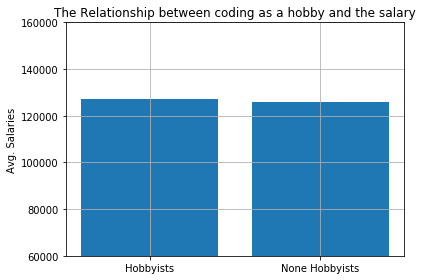

In [14]:
# Point One: The Relationship between coding as a hobby and the salary
start = time.perf_counter()
salaries = data['ConvertedComp']
total_paid = salaries.sum()
avg_salaries = salaries.mean()
yaxis = [60000, 160000]
salary_hobbyist = data.loc[data['Hobbyist'] == 'Yes', 'ConvertedComp']
total_salary_hobbyist = salary_hobbyist.sum()
avg_salary_hobbyist = salary_hobbyist.mean()

salary_none_hobbyist = data.loc[data['Hobbyist'] == 'No', 'ConvertedComp']
total_salary_none_hobbyist = salary_none_hobbyist.sum()
avg_salary_none_hobbyist = salary_none_hobbyist.mean()

# Ploting Data
fig, ax = plt.subplots()
x = np.arange(2)
Labels = ['Hobbyists', 'None Hobbyists'] # An Empty String because there is no need for xLabel

d = [avg_salary_hobbyist, avg_salary_none_hobbyist]
ax.set_ylabel('Avg. Salaries')
ax.set_ylim(yaxis)
ax.set_title('The Relationship between coding as a hobby and the salary')
plt.xticks(x, Labels)
plt.bar(x, d)
plt.grid()
fig.tight_layout()
PLOT_NAME = 'Ques-One-Plot.png'
fig.savefig(os.path.join(REPORTS_PATH, PLOT_NAME))

#Printing Data
msg = 'Point One: The Relationship between coding as a hobby and the salary\n'
msg += ('Total Paid annually: ' + str(int(total_paid)) + ' Per Year\nAvg: ' + str(int(avg_salaries)) + ' Per Year\n')
msg += ('Average Salary for Hobbyists: ' + str(int(avg_salary_hobbyist)) + ' Per Year\nPercent ~= ' + str(int(total_salary_hobbyist*100/total_paid)) + '\n')
msg += ('Average Salary for None-Hobbyists: ' + str(int(avg_salary_none_hobbyist)) + ' Per Year\nPercent ~= ' + str(int(total_salary_none_hobbyist*100/total_paid + 1)) + '\n') # This One Added to make it logical
msg += ('Plot Name: {}\n\n\n\n'.format(PLOT_NAME))
with open(FINAL_REPORT, 'w') as f:
    f.write(msg)
    f.close()
print(msg)

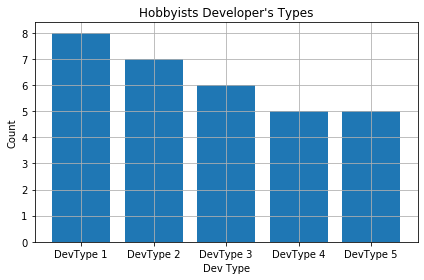

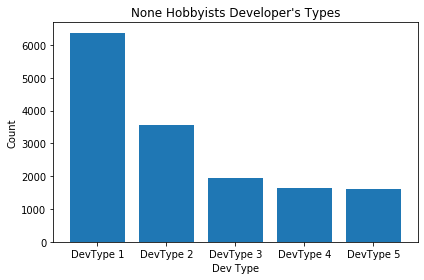

In [15]:
# Point Two: How many people code as a hobby in each DevType
def plt_one():
    # Plotting Hobbyists Developer's Types data
    x = np.arange(len(yes_dataframe))
    count = yes_dataframe['Count']
    fig, ax = plt.subplots()
    ax.set_title('Hobbyists Developer\'s Types')
    ax.bar(x, count)
    ax.set_xticks(x)
    ax.set_xticklabels(devs)
    ax.grid()
    ax.set_xlabel('Dev Type')
    ax.set_ylabel('Count')
    fig.tight_layout()
    PLOT_NAME = 'Ques-Two-Plot-One.png'
    fig.savefig(os.path.join(REPORTS_PATH, PLOT_NAME))
    msg = 'Point Two: How many people code as a hobby in each DevType?\nPart One: For Hobbyists Developers:\n'
    for element in zip(devs, yes_dataframe['Developer']):
        msg += ('{} : {}:\n'.format(element[0], element[1]))
        for innerelemnet in zip(count, no_dataframe.loc[no_dataframe['Developer'] == element[1], 'Count']):
            total = innerelemnet[0] + innerelemnet[1]
            msg += 'Count: {} Out of {} | Percent: {}\n\n'.format(innerelemnet[0], total, innerelemnet[0]*100/total)
    msg += 'Plot Name: {}\n\n\n\n'.format(PLOT_NAME)
    with open(FINAL_REPORT, 'a') as f:
        f.write(msg)
        f.close()

def plt_two():
    # Plotting None Hobbyists Developer's Types data
    count = no_dataframe['Count']        
    x = np.arange(len(no_dataframe))
    fig, ax = plt.subplots()
    ax.set_title('None Hobbyists Developer\'s Types')
    ax.bar(x, count)
    ax.set_xticks(x)
    ax.set_xticklabels(devs)
    ax.set_xlabel('Dev Type')
    ax.set_ylabel('Count')
    fig.tight_layout()
    PLOT_NAME = 'Ques-Two-Plot-Two.png'
    fig.savefig(os.path.join(REPORTS_PATH, PLOT_NAME))
    msg = 'Point Two: How many people code as a hobby in each DevType?\nPart Two: For None Hobbyists Developers:\n'
    for element in zip(devs, no_dataframe['Developer']):
        msg += ('{} : {}:\n'.format(element[0], element[1]))
        for innerelemnet in zip(count, yes_dataframe.loc[no_dataframe['Developer'] == element[1], 'Count']):
            total = innerelemnet[0] + innerelemnet[1]
            msg += 'Count: {} Out of {} | Percent: {}\n\n'.format(innerelemnet[0], total, innerelemnet[0]*100/total)
    msg += 'Plot Name: {}\n\n\n\n'.format(PLOT_NAME)
    with open(FINAL_REPORT, 'a') as f:
        f.write(msg)
        f.close()
                
start = time.perf_counter()
dev_types = data['DevType'].unique()
developers = []
yes = []
no = []

for dev_type in dev_types:
    unique, counts = np.unique(data.loc[data['DevType'] == dev_type, 'Hobbyist'], return_counts=True)
    developers.append(dev_type)
    try:
        yes.append(counts[0])
    except IndexError:
        yes.append(np.nan)
    try:
        no.append(counts[1])    
    except IndexError:
        no.append(np.nan)

df = pd.DataFrame({'Developer': developers, 'Yes_Count': yes, 'No_Count': no})

sorted_by_yes = df.sort_values(by=['Yes_Count'], ascending = False)
sorted_by_no = df.sort_values(by=['No_Count'], ascending = False)
sorted_by_yes.head()
yes_array = []
devs = []
# Modify the data frame to make that there is no confliction between loved and hated types
for dev, yes, no in zip(sorted_by_yes['Developer'], sorted_by_yes['Yes_Count'], sorted_by_yes['No_Count']):
    if yes > no:
        yes_array.append(yes)
        devs.append(dev)
        if len(devs) == 5:
            break
yes_dataframe = pd.DataFrame({'Developer': devs, 'Count': yes_array})

no_array = []
devs = []
# Modify the data frame to make that there is no confliction between loved and hated types
for dev, yes, no in zip(sorted_by_no['Developer'], sorted_by_no['Yes_Count'], sorted_by_no['No_Count']):
    if yes < no:
        no_array.append(no)
        devs.append(dev)
        if len(devs) == 5:
            break
no_dataframe = pd.DataFrame({'Developer': devs, 'Count': no_array})

devs = ['DevType 1', 'DevType 2', 'DevType 3', 'DevType 4', 'DevType 5']

# Plottedd Data
plt_one()
plt_two()


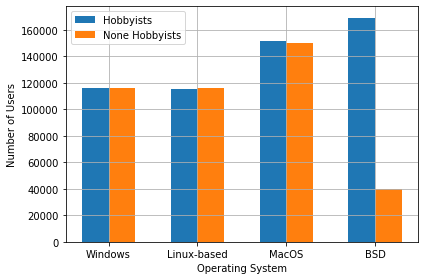

In [16]:
# Point Three: Avg. Salary for developers that use each opertating system in case there is hobbyists or not
opsystems = data['OpSys'].unique()
opsystems = opsystems[0:4]
yes_array = []
no_array = []
for ops in opsystems:
    avg_salary = data.loc[data['Hobbyist'] == 'Yes']
    avg_salary = avg_salary.loc[avg_salary['OpSys'] == ops, 'ConvertedComp']
    avg_salary = avg_salary.mean()
    yes_array.append(avg_salary)
    avg_salary = data.loc[data['Hobbyist'] == 'No']
    avg_salary = avg_salary.loc[avg_salary['OpSys'] == ops, 'ConvertedComp']
    avg_salary = avg_salary.mean()
    no_array.append(avg_salary)
    
fig, ax = plt.subplots()
x = np.arange(len(yes_array))
width = 0.3
ax.bar(x - width/2, yes_array, width, label='Hobbyists')
ax.bar(x + width/2, no_array, width, label='None Hobbyists')
ax.set_xticks(x)
ax.set_xticklabels(opsystems)
ax.legend()
ax.grid()
ax.set_xlabel('Operating System')
ax.set_ylabel('Number of Users')
fig.tight_layout()
PLOT_NAME = 'Ques-Three-Plot.png'
fig.savefig(os.path.join(REPORTS_PATH, PLOT_NAME))
msg = 'Point Three: Avg. Salary for developers that use each opertating system in case there is hobbyists or not.\n'
for sys, hobbyist, nonhobbyist in zip(opsystems, yes_array, no_array):
    msg += 'Operating System: {}: Average Salary for Hobbyists Developers ~= {}. /Average Salary for None-Hobbyists Developers ~= {}.\n'.format(sys, int(hobbyist), int(nonhobbyist))
msg += 'Plot Name: {}\n\n\n\n'.format(PLOT_NAME)
with open(FINAL_REPORT, 'a') as f:
    f.write(msg)
    f.close()


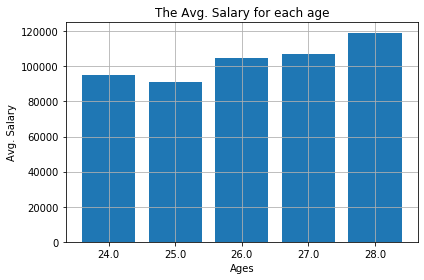

In [25]:
# Point Four: Avg. Salary for five most repeated ages / Number of Developers in each age.
start = time.perf_counter()
ages = data['Age'].value_counts()
ages = pd.DataFrame({'Age': list(ages.to_dict()),
                   'Count':list(ages)})
ages = ages[0:5]
avg = []
for age in ages['Age']:
    age_avg = data.loc[data['Age'] == age, 'ConvertedComp']
    age_avg = age_avg.mean()
    avg.append(int(age_avg))
ages['Avg. Salaries'] = avg

ages = ages.sort_values(by=['Age'], ascending=True)
# Plotting salaries for ages 
x = np.arange(len(ages['Age']))
plt.bar(x, ages['Avg. Salaries'])
plt.xticks(x, ages['Age'])
plt.grid()
plt.title('The Avg. Salary for each age')
plt.xlabel('Ages')
plt.ylabel('Avg. Salary')
plt.tight_layout()
PLOT_NAME = 'Ques-Four-Plot.png'
plt.savefig(os.path.join(REPORTS_PATH, PLOT_NAME))
msg = 'Point Four: Avg. Salary for five most repeated ages / Number of Developers in each age.\n'
for age, count, salary in zip(ages['Age'], ages['Count'], ages['Avg. Salaries']):
    msg += 'Numbers of Developers with age range of {} is {} and the Average Salary is {}.\n'.format(int(age), count, salary)

msg += 'Plot Name: {}\n\n\n\n'.format(PLOT_NAME)
with open(FINAL_REPORT, 'a') as f:
    f.write(msg)
    f.close()

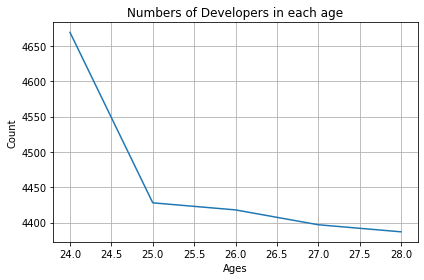

In [18]:
# Point Five: Avg. Salary for five most repeated ages / Number of Developers in each age.
plt.plot(ages['Age'].sort_values(ascending=True), ages['Count'])
plt.title('Numbers of Developers in each age')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.grid()
plt.tight_layout()
PLOT_NAME = 'Ques-Five-Plot.png'
plt.savefig(os.path.join(REPORTS_PATH, PLOT_NAME))
msg = 'Point Five: Number of Developers in each age.\n'
for age, salary in zip(ages['Age'], ages['Avg. Salaries']):
    msg += 'Average Salary for Developers with age range of {} is {}.\n'.format(int(age), salary)
msg += 'Plots: Ques-Five-Plot.png\n'
with open(FINAL_REPORT, 'a') as f:
    f.write(msg)
    f.close()